# Visualize pathway ranking

This notebook will visualize pathway ranking obtained by the different enrichment analysis methods.

In [1]:
%load_ext autoreload
%load_ext rpy2.ipython
%autoreload 2

import os
import pandas as pd
import numpy as np
import plotnine as pn

from ponyo import utils

np.random.seed(123)

In [2]:
# Read in config variables
base_dir = os.path.abspath(os.path.join(os.getcwd(), "../"))

config_filename = os.path.abspath(
    os.path.join(base_dir, "configs", "config_human_general.tsv")
)

params = utils.read_config(config_filename)

In [3]:
# Load params
dataset_name = params["dataset_name"]
project_id = params["project_id"]

In [4]:
# Create dictionary of enrichment method: statistic
method_stats_dict = {
    "GSEA": "padj",
    "GSVA": "ES",
    "ROAST": "FDR",
    "CAMERA": "FDR",
    "ORA": "p.adjust"
}

## Get pathway summary data

In [5]:
# Pathway summary files
gsea_pathway_summary_filename = os.path.join(
    base_dir, 
    dataset_name, 
    f"generic_pathway_summary_{project_id}.tsv"
)
gsva_pathway_summary_filename = os.path.join(
    base_dir, 
    dataset_name, 
    f"generic_pathway_summary_{project_id}_GSVA.tsv"
)
roast_pathway_summary_filename = os.path.join(
    base_dir, 
    dataset_name, 
    f"generic_pathway_summary_{project_id}_ROAST.tsv"
)
camera_pathway_summary_filename = os.path.join(
    base_dir, 
    dataset_name, 
    f"generic_pathway_summary_{project_id}_CAMERA.tsv"
)
ora_pathway_summary_filename = os.path.join(
    base_dir, 
    dataset_name, 
    f"generic_pathway_summary_{project_id}_ORA.tsv"
)

In [6]:
# Pathway summary data
gsea_pathway_summary = pd.read_csv(gsea_pathway_summary_filename, sep="\t", index_col=0, header=0)
gsva_pathway_summary = pd.read_csv(gsva_pathway_summary_filename, sep="\t", index_col=0, header=0)
roast_pathway_summary = pd.read_csv(roast_pathway_summary_filename, sep="\t", index_col=0, header=0)
camera_pathway_summary = pd.read_csv(camera_pathway_summary_filename, sep="\t", index_col=0, header=0)
ora_pathway_summary = pd.read_csv(ora_pathway_summary_filename, sep="\t", index_col=0, header=0)

## Format data for plotting

In [7]:
gsea_pathway_summary.head()

,Pathway ID,Adj P-value (Real),Rank (Real),padj (Real),Median adj p-value (simulated),Rank (simulated),Mean padj (simulated),Std deviation (simulated),Number of experiments (simulated),Z score
pathway,,,,,,,,,,
HALLMARK_GLYCOLYSIS,HALLMARK_GLYCOLYSIS,0.002069,49.0,0.002069,0.810846,24.0,0.599480,0.443281,22,-1.347705
HALLMARK_G2M_CHECKPOINT,HALLMARK_G2M_CHECKPOINT,0.002069,49.0,0.002069,1.000000,5.0,0.682664,0.428996,19,-1.586481
HALLMARK_E2F_TARGETS,HALLMARK_E2F_TARGETS,0.002069,49.0,0.002069,1.000000,5.0,0.647738,0.440403,17,-1.466087
HALLMARK_INFLAMMATORY_RESPONSE,HALLMARK_INFLAMMATORY_RESPONSE,0.002268,43.0,0.002268,0.314102,40.0,0.438064,0.433699,25,-1.004836
HALLMARK_ALLOGRAFT_REJECTION,HALLMARK_ALLOGRAFT_REJECTION,0.002268,43.0,0.002268,0.014170,48.0,0.202629,0.368128,25,-0.544269


In [8]:
gsva_pathway_summary.head()

,Pathway ID,Rank (Real),abs(ES) (Real),ES (Real),Rank (simulated),Mean abs(ES) (simulated),Std deviation (simulated),Number of experiments (simulated),Z score
pathway,,,,,,,,,
HALLMARK_TNFA_SIGNALING_VIA_NFKB,HALLMARK_TNFA_SIGNALING_VIA_NFKB,50.0,0.209187,-0.209187,50.0,0.172823,0.102192,25,0.355839
HALLMARK_ANGIOGENESIS,HALLMARK_ANGIOGENESIS,49.0,0.132144,0.132144,34.0,0.080977,0.056531,25,0.905115
HALLMARK_REACTIVE_OXIGEN_SPECIES_PATHWAY,HALLMARK_REACTIVE_OXIGEN_SPECIES_PATHWAY,48.0,0.128857,-0.128857,38.0,0.075773,0.037622,25,1.410993
HALLMARK_COMPLEMENT,HALLMARK_COMPLEMENT,47.0,0.128787,-0.128787,21.0,0.069969,0.066880,25,0.879466
HALLMARK_INTERFERON_GAMMA_RESPONSE,HALLMARK_INTERFERON_GAMMA_RESPONSE,46.0,0.124543,-0.124543,49.0,0.159338,0.102631,25,-0.339032


In [9]:
roast_pathway_summary.head()

,Pathway ID,Adj P-value (Real),Rank (Real),FDR (Real),Median adj p-value (simulated),Rank (simulated),Mean FDR (simulated),Std deviation (simulated),Number of experiments (simulated),Z score
pathway,,,,,,,,,,
HALLMARK_ADIPOGENESIS,HALLMARK_ADIPOGENESIS,0.0001,25.5,0.0001,0.0001,25.5,0.0001,0.0,25,NaN
HALLMARK_KRAS_SIGNALING_DN,HALLMARK_KRAS_SIGNALING_DN,0.0001,25.5,0.0001,0.0001,25.5,0.0001,0.0,25,NaN
HALLMARK_KRAS_SIGNALING_UP,HALLMARK_KRAS_SIGNALING_UP,0.0001,25.5,0.0001,0.0001,25.5,0.0001,0.0,25,NaN
HALLMARK_MITOTIC_SPINDLE,HALLMARK_MITOTIC_SPINDLE,0.0001,25.5,0.0001,0.0001,25.5,0.0001,0.0,25,NaN
HALLMARK_MTORC1_SIGNALING,HALLMARK_MTORC1_SIGNALING,0.0001,25.5,0.0001,0.0001,25.5,0.0001,0.0,25,NaN


In [10]:
camera_pathway_summary.head()

,Pathway ID,Adj P-value (Real),Rank (Real),FDR (Real),Median adj p-value (simulated),Rank (simulated),Mean FDR (simulated),Std deviation (simulated),Number of experiments (simulated),Z score
pathway,,,,,,,,,,
HALLMARK_ADIPOGENESIS,HALLMARK_ADIPOGENESIS,2.580185e-07,50.0,2.580185e-07,3.739628e-08,50.0,0.000040,0.000154,25,-0.254679
HALLMARK_ALLOGRAFT_REJECTION,HALLMARK_ALLOGRAFT_REJECTION,2.629681e-05,49.0,2.629681e-05,1.847834e-07,49.0,0.000100,0.000418,25,-0.175510
HALLMARK_ANDROGEN_RESPONSE,HALLMARK_ANDROGEN_RESPONSE,1.082655e-04,48.0,1.082655e-04,4.272574e-06,48.0,0.000176,0.000467,25,-0.144952
HALLMARK_ANGIOGENESIS,HALLMARK_ANGIOGENESIS,1.543327e-04,47.0,1.543327e-04,7.220993e-06,47.0,0.000379,0.000946,25,-0.237279
HALLMARK_APICAL_JUNCTION,HALLMARK_APICAL_JUNCTION,4.179875e-04,46.0,4.179875e-04,1.107009e-05,46.0,0.000931,0.002421,25,-0.211686


In [11]:
ora_pathway_summary.head()

,Pathway ID,Adj P-value (Real),Rank (Real),p.adjust (Real),Median adj p-value (simulated),Rank (simulated),Mean p.adjust (simulated),Std deviation (simulated),Number of experiments (simulated),Z score
pathway,,,,,,,,,,
HALLMARK_TNFA_SIGNALING_VIA_NFKB,HALLMARK_TNFA_SIGNALING_VIA_NFKB,2.239989e-11,12.0,2.239989e-11,8.384789e-03,12.0,0.017229,0.018248,6,-0.944192
HALLMARK_KRAS_SIGNALING_DN,HALLMARK_KRAS_SIGNALING_DN,1.218074e-05,11.0,1.218074e-05,9.728630e-10,38.0,0.002260,0.009691,19,-0.231956
HALLMARK_ESTROGEN_RESPONSE_LATE,HALLMARK_ESTROGEN_RESPONSE_LATE,1.289009e-05,9.5,1.289009e-05,4.498819e-03,15.0,0.009743,0.013670,11,-0.711801
HALLMARK_MYOGENESIS,HALLMARK_MYOGENESIS,1.289009e-05,9.5,1.289009e-05,1.091623e-10,39.0,0.000118,0.000499,18,-0.210030
HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION,HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION,1.429611e-05,8.0,1.429611e-05,1.854031e-07,36.0,0.007079,0.011743,14,-0.601644


## Plot

In [12]:
# define plotting function
def plot_significance_vs_ranking(summary_df, method_name, x_label, output_figure_filename):
    # Format input dataframe
    plot_df = pd.DataFrame(
        data={"Test statistic": summary_df[method_stats_dict[method_name]+" (Real)"].values,
          "Percentile rank": summary_df["Rank (simulated)"].rank(pct=True).values
         },
        index=summary_df.index
    )
    
    fig = pn.ggplot(plot_df, pn.aes(x='Test statistic', y='Percentile rank'))
    fig += pn.geom_point()
    fig += pn.geom_point(plot_df[plot_df['Percentile rank']>0.9],
                         pn.aes(x='Test statistic', y='Percentile rank'),
                         color='red'
                        )
    fig += pn.geom_text(pn.aes(label=
                               [x if plot_df.loc[x,'Percentile rank']>0.9 else "" for x in plot_df.index]),
                        ha='left',
                        va='top',
                        size=5
                       )
    fig += pn.labs(x = x_label,
                y = 'Percentile of ranking',
                title = f'{method_name} pathway statistics vs ranking')
    fig += pn.theme_bw()
    fig += pn.theme(
        legend_title_align = "center",
        plot_background=pn.element_rect(fill='white'),
        legend_key=pn.element_rect(fill='white', colour='white'), 
        legend_title=pn.element_text(family='sans-serif', size=15),
        legend_text=pn.element_text(family='sans-serif', size=12),
        plot_title=pn.element_text(family='sans-serif', size=15),
        axis_text=pn.element_text(family='sans-serif', size=12),
        axis_title=pn.element_text(family='sans-serif', size=15)
        )

    print(fig)
    
    # Save figure
    fig.save(
        output_figure_filename,
        format="svg",
        bbox_inches="tight",
        transparent=True,
        pad_inches=0,
        dpi=300,
    )

/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


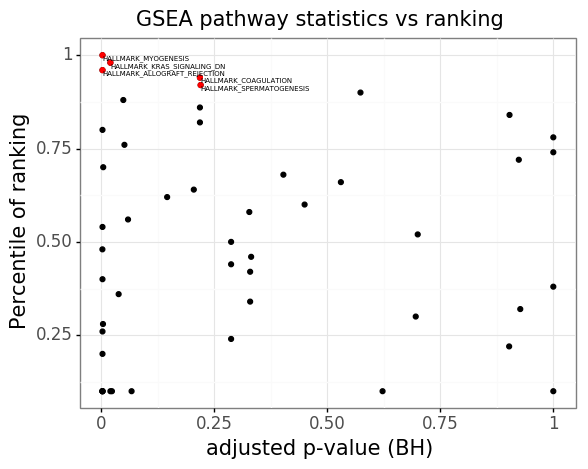

<ggplot: (8733169474673)>


/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units))
/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: GSEA_pathway_ranking.svg
  warn('Filename: {}'.format(filename))


In [13]:
plot_significance_vs_ranking(gsea_pathway_summary, "GSEA", "adjusted p-value (BH)", "GSEA_pathway_ranking.svg")

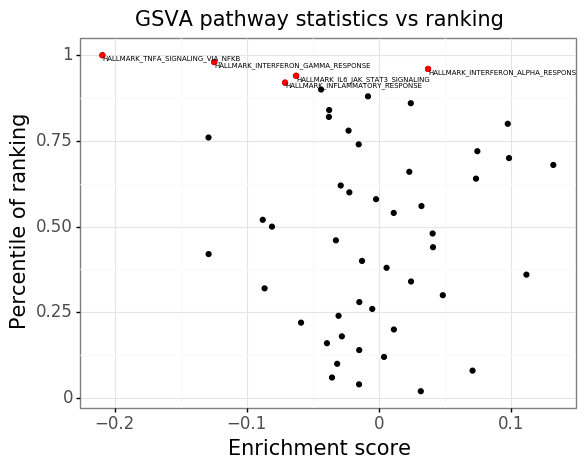

<ggplot: (8733169500221)>


/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: GSVA_pathway_ranking.svg
  warn('Filename: {}'.format(filename))


In [14]:
plot_significance_vs_ranking(gsva_pathway_summary, "GSVA", "Enrichment score", "GSVA_pathway_ranking.svg")

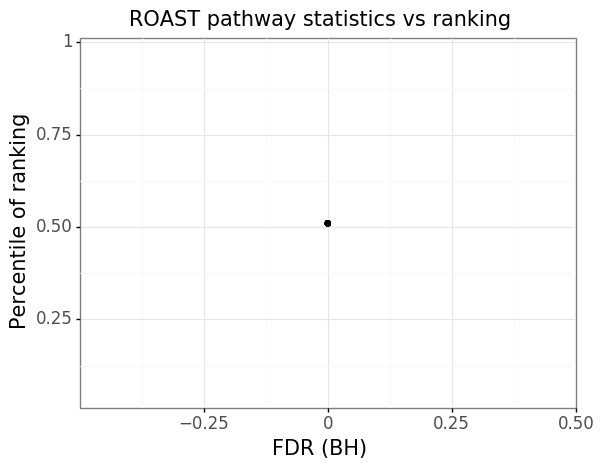

<ggplot: (8733167134773)>


/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: ROAST_pathway_ranking.svg
  warn('Filename: {}'.format(filename))


In [15]:
plot_significance_vs_ranking(roast_pathway_summary, "ROAST", "FDR (BH)", "ROAST_pathway_ranking.svg")

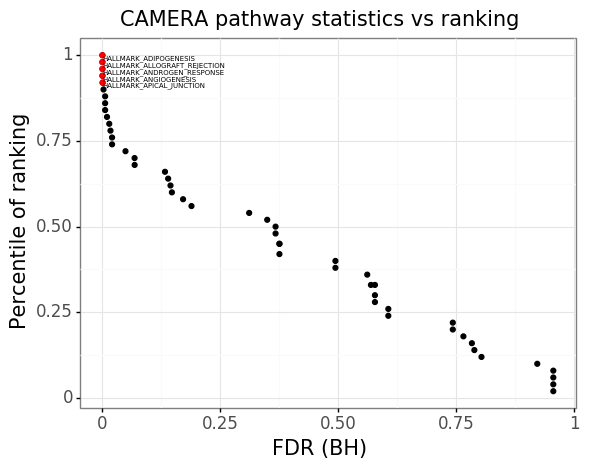

<ggplot: (8733167200025)>


/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: CAMERA_pathway_ranking.svg
  warn('Filename: {}'.format(filename))


In [16]:
plot_significance_vs_ranking(camera_pathway_summary, "CAMERA", "FDR (BH)", "CAMERA_pathway_ranking.svg")

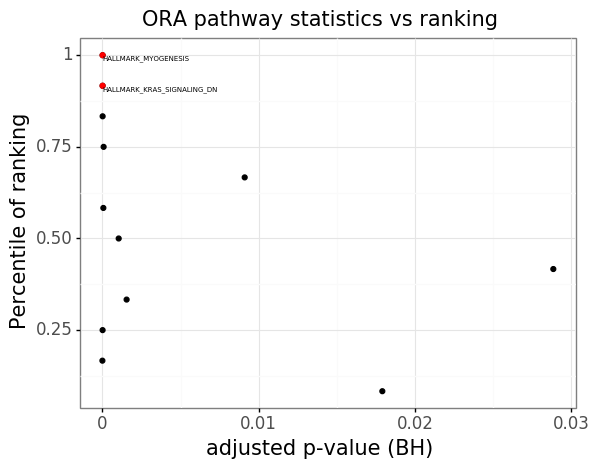

<ggplot: (8733167156677)>


/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: ORA_pathway_ranking.svg
  warn('Filename: {}'.format(filename))


In [17]:
plot_significance_vs_ranking(ora_pathway_summary, "ORA", "adjusted p-value (BH)", "ORA_pathway_ranking.svg")

**Takeaway:**
* Here are the results demonstrating that different enrichment methods can easily be plugged into our simulation workflow to identify generic gene sets
* Overall, it appears that the most enrichment gene sets are also those that are most commonly found to be enriched. However, depending on the enrichment method, generic gene sets will vary slightly due to the different assumptions and modeling procedures. More details about the methods can be found in the [previous notebook](2_apply_enrichment_method.ipynb)
* ROAST performs a self-contained test, which assesses the relevance of an individual biological process to the experiment at hand without reference to other genes in the genome. This lack of reference might account for why the scores are uniform across the different gene sets.